In [31]:
#1. Objective: 

#a)To determine total number of Covid19 cases in each state in Malaysia
#b)To determine total number of Covid19 cases in Malaysia
#c)To determine the highest number of Covid19 cases on a single day
#d)To determine which age group has the highest mean and interquartile range of Covid19 cases 
#e)To determine which state has the highest mean and interquartile range of Covid19 cases and death in 2021

#f)To determine the number of Covid19 death in Malaysia
#g)To determine the highest COVID19 death on a single day
#h)To determine the highest number of Covid19 cases and Covid19 death on a single day
#i)To determine which state has the highest mean and interquartile range of Covid19 death in 2021

#j)To determine the prevalence of ICU admission (ICU admission/total admission) and Covid19 death (Covid19 death/Covid19 cases)
#k)To explore whether any association between ICU admission and the number of Covid19 death
#l)To explore whether any association between ICU admission and age group
#m)To determine the number of ICU beds available and the utilization (cases_admitted)
#n)To determine the number of hospital beds available and the utilization (cases_admitted)
#o)To determine the number of PKRC beds available and the utilization (cases_admitted)

# import libraries
# ================

# for date and time opeations
from datetime import datetime, timedelta
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# storing and analysing data
import pandas as pd
# for scraping web contents
from bs4 import BeautifulSoup

# numerical analysis
import numpy as np

from urllib.request import urlopen

# urls of the files
url1 = 'https://raw.githubusercontent.com/shikinrusly/covid19-public/main/epidemic/cases_age.csv'

caseage_df = pd.read_csv(url1, index_col=0, parse_dates=True, squeeze = True)
caseage_df 
#dataframe of each group by week and state in Malaysia according to age group



,state,abs_0_4,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,...,capita_0_4,capita_5_11,capita_12_17,capita_18_29,capita_30_39,capita_40_49,capita_50_59,capita_60_69,capita_70_79,capita_80_+
week,,,,,,,,,,,,,,,,,,,,,
w24,Malaysia,5492,7719,6561,27488,21212,12878,8700,4730,1709,...,222.67,212.42,208.45,375.40,387.47,335.18,278.69,216.90,159.57,137.21
w23,Malaysia,6682,9847,8404,32206,24789,15157,9949,5417,1953,...,270.92,270.98,267.01,439.83,452.81,394.50,318.69,248.41,182.35,171.20
w22,Malaysia,7203,10585,9270,36083,28256,17677,11415,6184,2263,...,292.05,291.28,294.52,492.78,516.14,460.09,365.65,283.58,211.30,204.93
w21,Malaysia,7708,11935,10196,38532,30269,18734,12328,6707,2584,...,312.52,328.44,323.94,526.23,552.91,487.60,394.90,307.56,241.27,248.24
w20,Malaysia,8325,12539,11157,38831,30127,19106,12551,7033,2960,...,337.54,345.06,354.47,530.31,550.32,497.28,402.04,322.51,276.38,273.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w4,W.P. Putrajaya,19,38,9,33,75,23,10,8,4,...,168.14,176.74,94.74,211.54,342.47,141.98,119.05,170.21,571.43,0.00
w3,W.P. Putrajaya,15,30,11,30,57,28,7,7,0,...,132.74,139.53,115.79,192.31,260.27,172.84,83.33,148.94,0.00,0.00
w2,W.P. Putrajaya,14,35,7,22,49,23,6,8,1,...,123.89,162.79,73.68,141.03,223.74,141.98,71.43,170.21,142.86,0.00


In [30]:
list(caseage_df)

['state',
 'abs_0_4',
 'abs_5_11',
 'abs_12_17',
 'abs_18_29',
 'abs_30_39',
 'abs_40_49',
 'abs_50_59',
 'abs_60_69',
 'abs_70_79',
 'abs_80_+',
 'perc_0_4',
 'perc_5_11',
 'perc_12_17',
 'perc_18_29',
 'perc_30_39',
 'perc_40_49',
 'perc_50_59',
 'perc_60_69',
 'perc_70_79',
 'perc_80_+',
 'capita_0_4',
 'capita_5_11',
 'capita_12_17',
 'capita_18_29',
 'capita_30_39',
 'capita_40_49',
 'capita_50_59',
 'capita_60_69',
 'capita_70_79',
 'capita_80_+']

In [2]:
Malaysia = caseage_df.iloc[10]
Malaysia

state           Malaysia
abs_0_4             5119
abs_5_11            7595
abs_12_17           6479
abs_18_29          16989
abs_30_39          14428
abs_40_49           9147
abs_50_59           7218
abs_60_69           5251
abs_70_79           2460
abs_80_+             880
perc_0_4            6.77
perc_5_11          10.05
perc_12_17          8.57
perc_18_29         22.48
perc_30_39         19.09
perc_40_49          12.1
perc_50_59          9.55
perc_60_69          6.95
perc_70_79          3.26
perc_80_+           1.16
capita_0_4        207.55
capita_5_11        209.0
capita_12_17      205.85
capita_18_29      232.02
capita_30_39      263.55
capita_40_49      238.07
capita_50_59      231.21
capita_60_69      240.79
capita_70_79      229.69
capita_80_+       221.55
Name: w14, dtype: object

In [33]:
caseage_total = caseage_df.groupby(['state']).sum().sum() #total cases by age (i.e calculation of sum by column)
caseage_total



abs_0_4          254856.00
abs_5_11         382211.00
abs_12_17        289928.00
abs_18_29       1061035.00
abs_30_39        892206.00
abs_40_49        555466.00
abs_50_59        382872.00
abs_60_69        250009.00
abs_70_79        106480.00
abs_80_+          38371.00
perc_0_4           2975.93
perc_5_11          4498.01
perc_12_17         2732.93
perc_18_29        10556.33
perc_30_39         9499.78
perc_40_49         5754.39
perc_50_59         4135.37
perc_60_69         3044.22
perc_70_79         1333.70
perc_80_+           469.01
capita_0_4        77921.26
capita_5_11       79618.96
capita_12_17      69682.60
capita_18_29     108099.89
capita_30_39     119253.21
capita_40_49     104436.83
capita_50_59      87873.63
capita_60_69      85703.62
capita_70_79      80161.39
capita_80_+       76346.61
dtype: float64

In [34]:
dfcaseage_total = pd.DataFrame(caseage_total, columns = ['Total COVID19 Cases'])
dfcaseage_total #dataframe of total covid cases base on age group

,Total COVID19 Cases
abs_0_4,254856.00
abs_5_11,382211.00
abs_12_17,289928.00
abs_18_29,1061035.00
abs_30_39,892206.00
abs_40_49,555466.00
abs_50_59,382872.00
abs_60_69,250009.00
abs_70_79,106480.00
abs_80_+,38371.00


In [4]:
caseage_total = caseage_df.groupby(['state']).sum() #total cases by age (i.e calculation of sum by column)
caseage_total


,abs_0_4,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,...,capita_0_4,capita_5_11,capita_12_17,capita_18_29,capita_30_39,capita_40_49,capita_50_59,capita_60_69,capita_70_79,capita_80_+
state,,,,,,,,,,,,,,,,,,,,,
Johor,10515,14990,10503,45967,35402,21021,13911,9011,3938,1550,...,3539.21,3637.45,2918.29,5688.98,5806.47,4473.53,3672.42,3414.55,3040.94,2975.05
Kedah,9751,16179,12685,31179,22296,16035,12357,8128,3248,1198,...,5571.99,6268.50,6000.46,6278.51,7368.14,6695.21,5634.74,4861.24,3936.96,3641.33
Kelantan,10120,15968,12616,28830,22113,14925,13074,10263,4687,1384,...,5403.11,5857.67,5990.51,6432.42,8912.95,8592.38,7962.24,8488.84,7890.60,6377.89
Klang Valley,30956,44565,32160,148519,135684,81750,49556,27749,10758,3605,...,4977.65,4864.12,4470.42,9018.08,8099.57,6921.51,5947.67,5365.22,4482.49,5106.25
Malaysia,111950,168823,128884,456258,378261,236858,166658,111130,47861,17383,...,4539.02,4645.79,4094.80,6231.08,6909.51,6164.81,5338.52,5096.06,4468.84,4376.40
Melaka,3513,4617,3276,14682,11181,6082,4218,2922,1202,374,...,5004.27,4682.55,3787.29,6945.13,7453.99,6231.56,4421.37,4192.26,3138.38,2493.34
Negeri Sembilan,3374,5050,3622,13140,10914,6526,4430,3224,1121,432,...,3905.09,4258.00,3310.77,5142.88,6176.55,5366.77,4016.32,3570.33,2577.00,2618.18
Pahang,5850,9601,6335,18167,15615,9316,6502,4232,1780,504,...,4425.13,4856.36,3661.83,4813.74,5684.38,5299.21,4334.68,3696.08,2961.74,2163.09
Perak,5091,7724,6590,23899,18120,11724,9690,8112,3751,1377,...,3123.32,3122.06,2778.27,4214.22,4968.47,4560.11,3667.69,3621.41,2883.15,2481.11


In [5]:
caseage_state_week = caseage_df.groupby(['state','week']).sum() #total cases by age (i.e calculation of sum by column)
caseage_state_week.head()

abs_0_4  abs_5_11  abs_12_17  abs_18_29  abs_30_39  abs_40_49  \
state week                                                                  
Johor w0        128       255        108        517        437        292   
      w1        157       271        146        553        570        350   
      w10       295       385        168        715        611        404   
      w11       304       407        240        889        810        452   
      w12       397       541        320       1201       1014        650   

            abs_50_59  abs_60_69  abs_70_79  abs_80_+  ...  capita_0_4  \
state week                                             ...               
Johor w0          267        193         81        38  ...       43.08   
      w1          299        223         99        35  ...       52.84   
      w10         302        258         98        41  ...       99.29   
      w11         395        269        139        66  ...      102.32   
      w12         420        365        149        73  ...      133.63   

            capita_5_11  capita_12_17  capita_18_29  capita_30_39  \
state week                                                          
Johor w0          61.88         30.01         63.99         71.67   
      w1          65.76         40.57         68.44         93.49   
      w10         93.42         46.68         88.49        100.21   
      w11         98.76         66.69        110.02        132.85   
      w12        131.28         88.91        148.64        166.31   

            capita_40_49  capita_50_59  capita_60_69  capita_70_79  \
state week                                                           
Johor w0           62.14         70.49         73.13         62.55   
      w1           74.48         78.93         84.50         76.45   
      w10          85.98         79.73         97.76         75.68   
      w11          96.19        104.28        101.93        107.34   
      w12         138.33        110.88        138.31        115.06   

            capita_80_+  
state week               
Johor w0          72.94  
      w1          67.18  
      w10         78.69  
      w11        126.68  
      w12        140.12  

[5 rows x 30 columns]

In [21]:
caseage_totalw = caseage_df.groupby(['week']).sum() #total cases by age (i.e calculation of sum by column)
caseage_totalw # u get same result with caseage_total.sum()

,abs_0_4,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,...,capita_0_4,capita_5_11,capita_12_17,capita_18_29,capita_30_39,capita_40_49,capita_50_59,capita_60_69,capita_70_79,capita_80_+
week,,,,,,,,,,,,,,,,,,,,,
w0,2756,4721,2592,11688,11026,6534,5298,3971,1717,538,...,994.30,1186.41,866.24,1456.97,1750.33,1528.10,1511.71,1492.29,1520.09,1518.89
w1,2824,4462,2327,12659,11832,6915,5422,4288,1727,567,...,903.12,932.84,653.64,1511.73,1880.87,1574.90,1478.98,1696.87,1378.10,1188.61
w10,6407,9320,3921,19416,18800,11449,8675,6799,3206,1209,...,2125.97,2150.66,1086.16,2280.53,2886.11,2440.15,2280.16,2476.03,2616.33,2292.74
w11,6505,9267,4541,18729,18701,11398,8707,6908,3176,1134,...,2073.60,2132.39,1175.79,2063.29,2875.24,2395.12,2165.81,2453.32,2345.25,2047.27
w12,7774,10905,7122,24193,22148,13699,10228,7946,3749,1628,...,2581.76,2460.30,1860.13,2625.52,3296.07,2804.81,2432.85,2803.54,3199.58,3461.01
w13,9018,13473,10231,28510,25594,15763,12467,9221,4616,1810,...,2984.94,3154.14,2848.97,3121.46,3920.87,3438.73,3232.48,3481.35,3819.29,3787.18
w14,10992,16178,13676,36574,31215,19668,15410,11054,5137,1828,...,3497.11,3547.59,3514.30,3972.24,4648.40,4225.13,3731.55,3813.40,3630.93,3904.37
w15,13516,20294,17633,47961,40881,25894,18896,13494,6160,2275,...,4343.38,4366.65,4343.23,4877.79,5630.77,5172.52,4395.62,4454.15,4320.98,4037.08
w16,15731,23799,20589,59541,50164,31394,22308,15065,6811,2507,...,4749.96,4918.74,4858.84,5730.25,6652.37,5955.71,5059.61,4921.83,4681.15,4520.00


In [6]:
#a)To determine total number of Covid19 cases in each state in Malaysia according to age group
state_wise = caseage_df.groupby('state')['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',  
                                                'abs_60_69',  'abs_70_79',  'abs_80_+'].sum()
state_wise
 


<ipython-input-6-6a6f3a48f5ae>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_wise = caseage_df.groupby('state')['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',


,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+
state,,,,,,,,,
Johor,14990,10503,45967,35402,21021,13911,9011,3938,1550
Kedah,16179,12685,31179,22296,16035,12357,8128,3248,1198
Kelantan,15968,12616,28830,22113,14925,13074,10263,4687,1384
Klang Valley,44565,32160,148519,135684,81750,49556,27749,10758,3605
Malaysia,168823,128884,456258,378261,236858,166658,111130,47861,17383
Melaka,4617,3276,14682,11181,6082,4218,2922,1202,374
Negeri Sembilan,5050,3622,13140,10914,6526,4430,3224,1121,432
Pahang,9601,6335,18167,15615,9316,6502,4232,1780,504
Perak,7724,6590,23899,18120,11724,9690,8112,3751,1377


In [135]:
state_weekwise = caseage_df.groupby(['state', 'week'])['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',  
                                                'abs_60_69',  'abs_70_79',  'abs_80_+'].sum()
week_sort=state_weekwise.sort_values(by='week')
week_sort #unable to sort as week column contain complex value (w0,w1...etc)

<ipython-input-135-2f506c395260>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_weekwise = caseage_df.groupby(['state', 'week'])['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',


,,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+
state,week,,,,,,,,,
Johor,w0,255,108,517,437,292,267,193,81,38
Negeri Sembilan,w0,83,67,207,211,119,134,99,32,8
Malaysia,w0,2079,1140,4900,4608,2767,2287,1727,751,245
Pahang,w0,138,75,269,310,160,131,89,60,25
Perak,w0,48,28,163,156,122,128,139,63,26
...,...,...,...,...,...,...,...,...,...,...
Sarawak,w9,117,32,666,734,444,405,473,251,121
Selangor,w9,713,293,1750,1750,1029,655,372,139,32
Terengganu,w9,98,28,287,340,188,150,172,82,29


In [91]:
Klang_Valley = state_weekwise.loc['Klang Valley']
Klang_Valley.sum()


abs_5_11      44565
abs_12_17     32160
abs_18_29    148519
abs_30_39    135684
abs_40_49     81750
abs_50_59     49556
abs_60_69     27749
abs_70_79     10758
abs_80_+       3605
dtype: int64

In [90]:
Klang_Valley.sort_values(by = 'week',ascending=True)

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+
week,,,,,,,,,
w0,563,312,1888,1810,1000,724,517,215,48
w1,546,281,1891,1824,989,628,422,167,45
w10,1034,527,2428,2394,1447,915,507,224,63
w11,913,493,2043,2079,1226,759,498,174,40
w12,997,738,2729,2470,1479,934,476,225,74
w13,981,767,2478,2360,1435,849,505,218,78
w14,988,718,2596,2359,1374,974,552,217,68
w15,1352,1029,3655,3661,2176,1338,812,342,109
w16,1503,1043,4569,4536,2596,1660,927,409,147


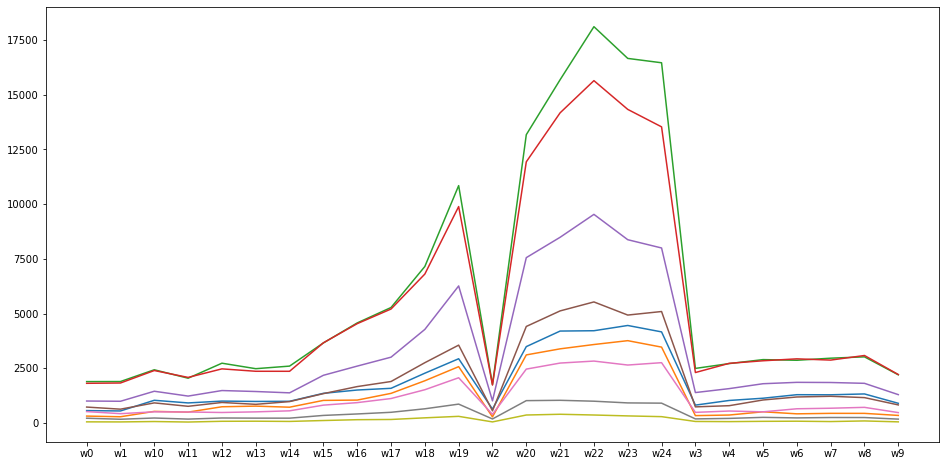

In [69]:
# Import library 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(Klang_Valley);  #this chart is inaccurate

In [87]:
SELANGOR = state_weekwise.loc['Selangor']
SELANGOR

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+
week,,,,,,,,,
w0,415,228,1443,1305,715,514,367,157,38
w1,435,221,1491,1380,778,533,345,133,38
w10,822,406,1935,1902,1165,723,397,168,50
w11,729,420,1649,1601,963,604,366,115,27
w12,810,586,2260,2022,1233,767,372,168,54
w13,794,613,2074,1905,1193,699,413,172,57
w14,815,600,2205,1937,1124,832,472,172,49
w15,1121,896,3199,3113,1865,1149,671,267,81
w16,1246,902,3914,3851,2247,1391,752,312,109


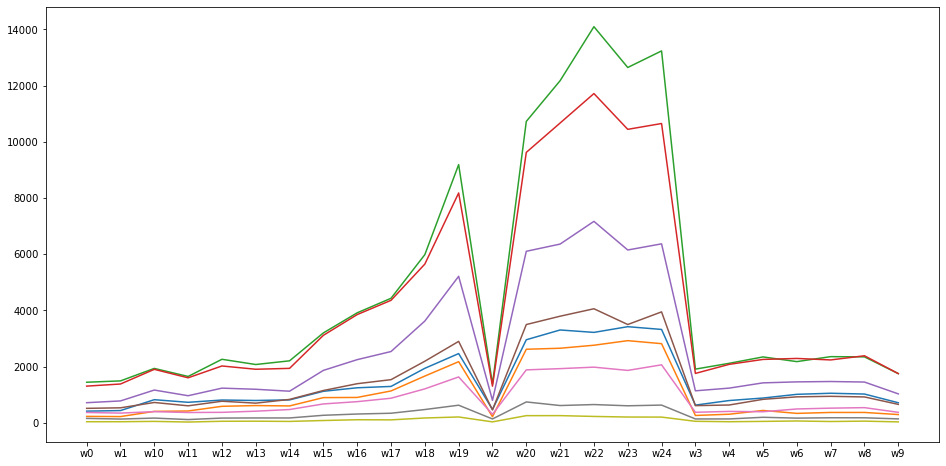

In [95]:
# Import library 
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))         
plt.plot(SELANGOR);           
           

           

In [96]:
state_wise['School_Children'] = state_wise['abs_5_11'] + state_wise['abs_12_17']
school_children = state_wise['School_Children']
school_children #otal number of  COVID19 cases for school children age-group (age 5-17)
print (school_children)

state
Johor                 25493
Kedah                 28864
Kelantan              28584
Klang Valley          76725
Malaysia             297707
Melaka                 7893
Negeri Sembilan        8672
Pahang                15936
Perak                 14314
Perlis                 1050
Pulau Pinang          16381
Sabah                 31590
Sarawak               27365
Selangor              61873
Terengganu            14575
W.P. Kuala Lumpur     13383
W.P. Labuan             265
W.P. Putrajaya         1469
Name: School_Children, dtype: int64


In [97]:
state_wise['Adult'] = state_wise['abs_18_29']+state_wise['abs_30_39']+state_wise['abs_40_49'] + state_wise['abs_50_59']
adult=state_wise['Adult']
adult #otal number of  COVID19 cases for adult age-group (age 18-59)

state
Johor                 116301
Kedah                  81867
Kelantan               78942
Klang Valley          415509
Malaysia             1238035
Melaka                 36163
Negeri Sembilan        35010
Pahang                 49600
Perak                  63433
Perlis                  4246
Pulau Pinang           88552
Sabah                 108251
Sarawak               117392
Selangor              328779
Terengganu             41776
W.P. Kuala Lumpur      82443
W.P. Labuan              993
W.P. Putrajaya          4287
Name: Adult, dtype: int64

In [98]:
state_wise['Elderly'] = state_wise['abs_60_69']+state_wise['abs_70_79']+state_wise['abs_80_+'] 
elderly = state_wise['Elderly'] #adding new column
elderly # total number of  COVID19 cases for elderly age-group (age >60)

state
Johor                 14499
Kedah                 12574
Kelantan              16334
Klang Valley          42112
Malaysia             176374
Melaka                 4498
Negeri Sembilan        4777
Pahang                 6516
Perak                 13240
Perlis                  990
Pulau Pinang          13081
Sabah                 15468
Sarawak               24548
Selangor              31096
Terengganu             7632
W.P. Kuala Lumpur     10781
W.P. Labuan             105
W.P. Putrajaya          235
Name: Elderly, dtype: int64

In [131]:
state_only = state_wise.drop(['Malaysia'])
state_only

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,School_Children,Adult,Elderly
state,,,,,,,,,,,,
Johor,14990,10503,45967,35402,21021,13911,9011,3938,1550,25493,116301,14499
Kedah,16179,12685,31179,22296,16035,12357,8128,3248,1198,28864,81867,12574
Kelantan,15968,12616,28830,22113,14925,13074,10263,4687,1384,28584,78942,16334
Klang Valley,44565,32160,148519,135684,81750,49556,27749,10758,3605,76725,415509,42112
Melaka,4617,3276,14682,11181,6082,4218,2922,1202,374,7893,36163,4498
Negeri Sembilan,5050,3622,13140,10914,6526,4430,3224,1121,432,8672,35010,4777
Pahang,9601,6335,18167,15615,9316,6502,4232,1780,504,15936,49600,6516
Perak,7724,6590,23899,18120,11724,9690,8112,3751,1377,14314,63433,13240
Perlis,650,400,1393,1407,794,652,580,296,114,1050,4246,990


In [100]:
#b)To determine total number of Covid19 cases in Malaysia accoding to age group
Malaysia_wise = state_wise.iloc[[4]]
Malaysia_wise #total COVID19 cases in each group

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,School_Children,Adult,Elderly
state,,,,,,,,,,,,
Malaysia,168823,128884,456258,378261,236858,166658,111130,47861,17383,297707,1238035,176374


In [101]:
state_max= state_only.idxmax()
state_max

abs_5_11           Klang Valley
abs_12_17          Klang Valley
abs_18_29          Klang Valley
abs_30_39          Klang Valley
abs_40_49          Klang Valley
abs_50_59          Klang Valley
abs_60_69          Klang Valley
abs_70_79          Klang Valley
abs_80_+           Klang Valley
School_Children    Klang Valley
Adult              Klang Valley
Elderly            Klang Valley
dtype: object

In [102]:
#c)To determine the highest number of Covid19 cases in age group
state_only.sum() #highest number of cases in 18-29 age group & Adult age group

abs_5_11            213388
abs_12_17           161044
abs_18_29           604777
abs_30_39           513945
abs_40_49           318608
abs_50_59           216214
abs_60_69           138879
abs_70_79            58619
abs_80_+             20988
School_Children     374432
Adult              1653544
Elderly             218486
dtype: int64

In [103]:
column = state_only.max()
column_max= column.idxmax()
column_max

'Adult'

In [115]:
print('The highest number of Covid19 cases among' + "", column_max  +"", 'age group')

The highest number of Covid19 cases among Adult age group


In [116]:
#d)To determine which age group has the highest mean and interquartile range of Covid19 cases
state_wise.describe()

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,School_Children,Adult,Elderly
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,1.800000e+01,18.000000
mean,21233.944444,16107.111111,58946.388889,49567.000000,30859.222222,21270.666667,13889.388889,5915.555556,2131.722222,37341.055556,1.606433e+05,21936.666667
std,38589.393457,29394.370919,106420.241632,89259.410356,55640.574764,38475.296311,25294.894051,10840.792201,3933.851530,67975.975287,2.896609e+05,40051.944714
min,178.000000,87.000000,390.000000,307.000000,183.000000,113.000000,72.000000,26.000000,7.000000,265.000000,9.930000e+02,105.000000
25%,5718.500000,4110.000000,14797.500000,11587.250000,6814.500000,4859.000000,3476.000000,1346.500000,450.000000,9849.750000,3.756625e+04,5211.750000
50%,9244.500000,7041.500000,28606.500000,22204.500000,15447.500000,10905.000000,7854.500000,3499.500000,1287.500000,16158.500000,8.040450e+04,12827.500000
75%,16126.250000,13077.250000,41078.250000,33461.250000,21003.250000,14463.750000,10137.750000,4505.000000,1731.500000,28794.000000,1.142885e+05,16117.500000
max,168823.000000,128884.000000,456258.000000,378261.000000,236858.000000,166658.000000,111130.000000,47861.000000,17383.000000,297707.000000,1.238035e+06,176374.000000


In [117]:
#e)To determine which state has the highest COVID19 cases 
dfstate_sum = state_only.sum(axis=1)
dfstate_sum.sort_values(inplace = True, ascending = True)
dfstate_sum


state
W.P. Labuan             2726
W.P. Putrajaya         11982
Perlis                 12572
Negeri Sembilan        96918
Melaka                 97108
Terengganu            127966
Pahang                144104
Perak                 181974
W.P. Kuala Lumpur     213214
Pulau Pinang          236028
Kedah                 246610
Kelantan              247720
Sabah                 310618
Johor                 312586
Sarawak               338610
Selangor              843496
Klang Valley         1068692
dtype: int64

In [118]:
print ('Klang Valley has the highest COVID19 cases:', dfstate_sum.max())

Klang Valley has the highest COVID19 cases: 1068692


In [119]:
##e)To determine the highest mean and interquartile range in the state with highest cases
dfstate_sum.describe()



count    1.700000e+01
mean     2.642896e+05
std      2.836970e+05
min      2.726000e+03
25%      9.710800e+04
50%      2.132140e+05
75%      3.106180e+05
max      1.068692e+06
dtype: float64

In [120]:
klang_valley = state_only.iloc[[3]]
klang_valley

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,School_Children,Adult,Elderly
state,,,,,,,,,,,,
Klang Valley,44565,32160,148519,135684,81750,49556,27749,10758,3605,76725,415509,42112


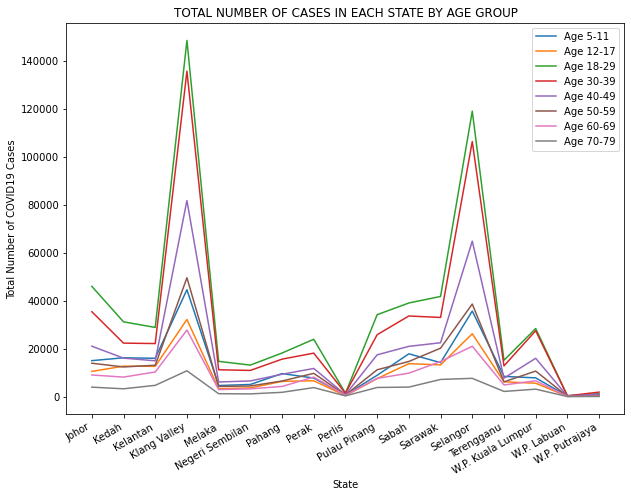

In [121]:
# Import library 
import matplotlib.pyplot as plt

# Plot graph
statewise_cases1 = state_only.abs_5_11
statewise_cases2 = state_only.abs_12_17
statewise_cases3 = state_only.abs_18_29
statewise_cases4 = state_only.abs_30_39
statewise_cases5 = state_only.abs_40_49
statewise_cases6 = state_only.abs_50_59
statewise_cases7 = state_only.abs_60_69
statewise_cases8 = state_only.abs_70_79


plt.figure(figsize=(10, 8))
plt.plot(statewise_cases1)
plt.plot(statewise_cases2)
plt.plot(statewise_cases3)
plt.plot(statewise_cases4)
plt.plot(statewise_cases5)
plt.plot(statewise_cases6)
plt.plot(statewise_cases7)
plt.plot(statewise_cases8)



plt.title('TOTAL NUMBER OF CASES IN EACH STATE BY AGE GROUP')
plt.xlabel('State')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['Age 5-11', 'Age 12-17','Age 18-29', 'Age 30-39', 'Age 40-49',
            'Age 50-59', 'Age 60-69', 'Age 70-79', 'Age >80'])
# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()

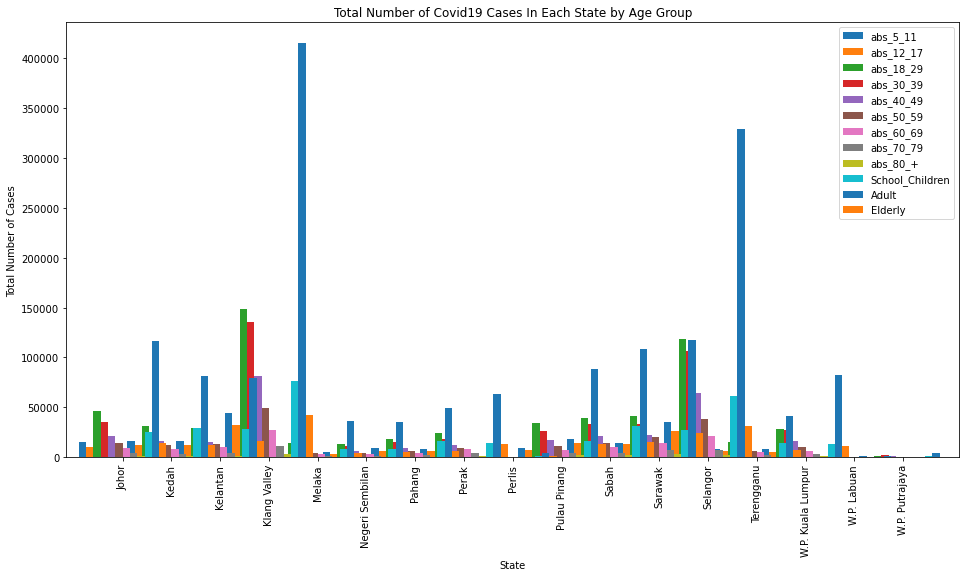

In [138]:

state_only.plot(kind='bar', title='Total Number of Covid19 Cases In Each State by Age Group', ylabel='Total Number of Cases',
         xlabel='State', figsize=(16, 8), width=1.8);

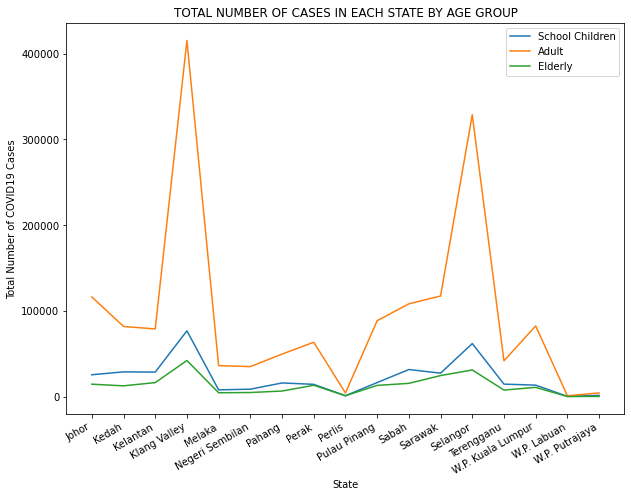

In [142]:
# Import library 
import matplotlib.pyplot as plt

# Plot graph
statewise_casesSC = state_only.School_Children
statewise_casesA= state_only.Adult
statewise_casesE = state_only.Elderly

plt.figure(figsize=(10, 8))
plt.plot(statewise_casesSC)
plt.plot(statewise_casesA)
plt.plot(statewise_casesE)

plt.title('TOTAL NUMBER OF CASES IN EACH STATE BY AGE GROUP')
plt.xlabel('State')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['School Children', 'Adult','Elderly'])
# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()

In [147]:
#to plot by barchart


In [148]:
import pandas as pd
from urllib.request import urlopen
url2 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'

casemalaysia_df = pd.read_csv(url2, index_col=0, parse_dates=True, squeeze = True)
casemalaysia_df


,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,cases_child,...,cases_60_69,cases_70_79,cases_80,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,4,4,0,4,0,4,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,0,0,0,4,0,0,0,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,3,3,0,7,0,3,0,0,0,1,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,2641,338,2808,39696,73,572,19,1756,294,419,...,193,91,50,0.0,7.0,9.0,42.0,0.0,0.0,15.0
2022-01-11,3175,272,2977,39886,171,710,18,2109,338,503,...,215,101,30,3.0,9.0,28.0,10.0,52.0,0.0,69.0
2022-01-12,3198,303,3200,39875,164,715,27,2096,360,492,...,241,96,31,7.0,40.0,6.0,7.0,49.0,0.0,55.0


In [149]:
list(casemalaysia_df)

['cases_new',
 'cases_import',
 'cases_recovered',
 'cases_active',
 'cases_cluster',
 'cases_unvax',
 'cases_pvax',
 'cases_fvax',
 'cases_boost',
 'cases_child',
 'cases_adolescent',
 'cases_adult',
 'cases_elderly',
 'cases_0_4',
 'cases_5_11',
 'cases_12_17',
 'cases_18_29',
 'cases_30_39',
 'cases_40_49',
 'cases_50_59',
 'cases_60_69',
 'cases_70_79',
 'cases_80',
 'cluster_import',
 'cluster_religious',
 'cluster_community',
 'cluster_highRisk',
 'cluster_education',
 'cluster_detentionCentre',
 'cluster_workplace']

In [150]:
typecases=casemalaysia_df.groupby('date')['cases_new','cases_recovered','cases_active'].sum()
typecases

<ipython-input-150-4288d8a728e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  typecases=casemalaysia_df.groupby('date')['cases_new','cases_recovered','cases_active'].sum()


,cases_new,cases_recovered,cases_active
date,,,
2020-01-25,4,0,4
2020-01-26,0,0,4
2020-01-27,0,0,4
2020-01-28,0,0,4
2020-01-29,3,0,7
...,...,...,...
2022-01-10,2641,2808,39696
2022-01-11,3175,2977,39886
2022-01-12,3198,3200,39875


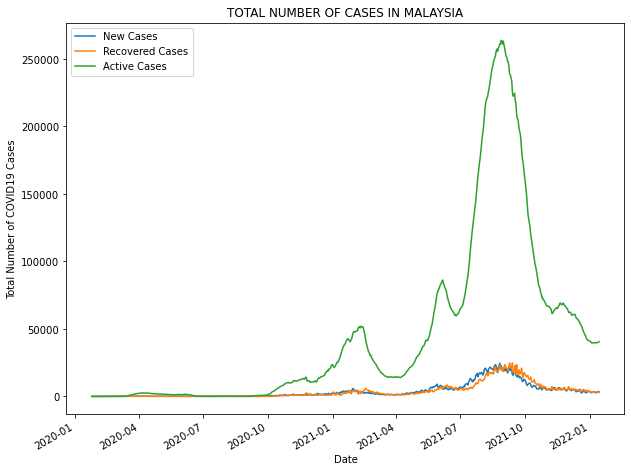

In [151]:
#Plot to visualize

plt.figure(figsize=(10, 8))

plt.plot(typecases)



plt.title('TOTAL NUMBER OF CASES IN MALAYSIA')
plt.xlabel('Date')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['New Cases', 'Recovered Cases','Active Cases'])


plt.gcf().autofmt_xdate()
plt.show()

In [152]:
#only new cases
only_new_case= casemalaysia_df.groupby('date')['cases_new'].sum()
only_new_case

date
2020-01-25       4
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       3
              ... 
2022-01-10    2641
2022-01-11    3175
2022-01-12    3198
2022-01-13    3684
2022-01-14    3346
Name: cases_new, Length: 721, dtype: int64

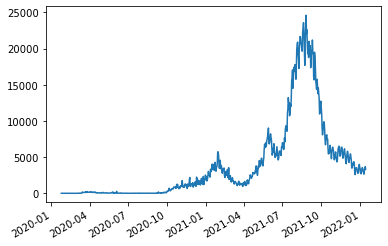

In [153]:
plt.plot(only_new_case)
plt.gcf().autofmt_xdate()

In [154]:
vaxcases = casemalaysia_df.groupby('date')['cases_unvax',
 'cases_pvax',
 'cases_fvax',
 'cases_boost',].sum()
vaxcases

<ipython-input-154-617494d883c0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vaxcases = casemalaysia_df.groupby('date')['cases_unvax',


,cases_unvax,cases_pvax,cases_fvax,cases_boost
date,,,,
2020-01-25,4,0,0,0
2020-01-26,0,0,0,0
2020-01-27,0,0,0,0
2020-01-28,0,0,0,0
2020-01-29,3,0,0,0
...,...,...,...,...
2022-01-10,572,19,1756,294
2022-01-11,710,18,2109,338
2022-01-12,715,27,2096,360


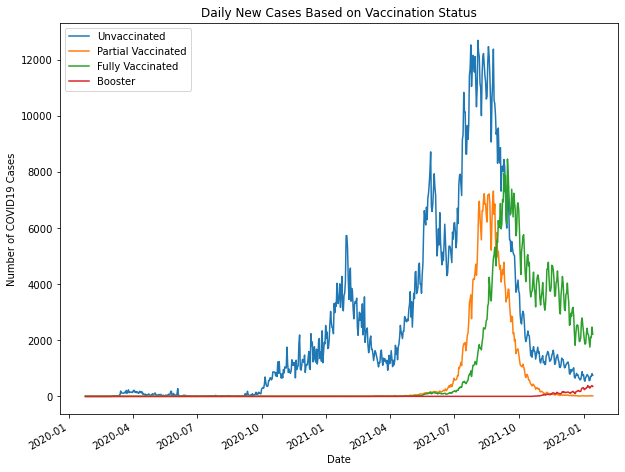

In [155]:
# Import library 
import matplotlib.pyplot as plt

# Plot graph
unvax_cases = casemalaysia_df.cases_unvax
pvax_cases = casemalaysia_df.cases_pvax
fvax_cases = casemalaysia_df.cases_fvax
boost_cases = casemalaysia_df.cases_boost
plt.figure(figsize=(10, 8))
plt.plot(unvax_cases)
plt.plot(pvax_cases)
plt.plot(fvax_cases)
plt.plot(boost_cases)
plt.title('Daily New Cases Based on Vaccination Status')
plt.xlabel('Date')
plt.ylabel('Number of COVID19 Cases')
plt.legend(['Unvaccinated','Partial Vaccinated','Fully Vaccinated','Booster'])

# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()

In [156]:
agegroupcases = casemalaysia_df.groupby('date')['cases_child',
 'cases_adolescent',
 'cases_adult',
 'cases_elderly'].sum()
agegroupcases

<ipython-input-156-97ff91c2702e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agegroupcases = casemalaysia_df.groupby('date')['cases_child',


,cases_child,cases_adolescent,cases_adult,cases_elderly
date,,,,
2020-01-25,0,0,1,0
2020-01-26,0,0,0,0
2020-01-27,0,0,0,0
2020-01-28,0,0,0,0
2020-01-29,1,0,2,0
...,...,...,...,...
2022-01-10,419,160,1709,334
2022-01-11,503,231,2080,346
2022-01-12,492,168,2151,368


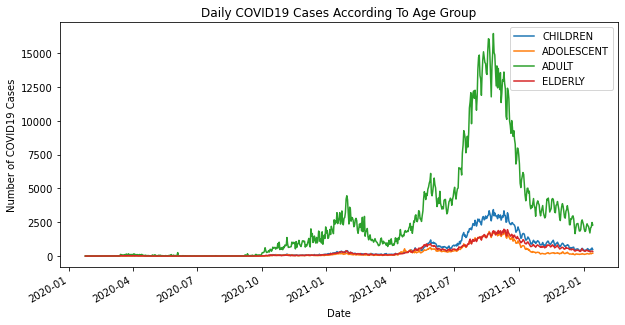

In [157]:
# Import library 
import matplotlib.pyplot as plt

# Plot graph
Child = casemalaysia_df.cases_child
Adolescent = casemalaysia_df.cases_adolescent
Adult = casemalaysia_df.cases_adult
Elderly = casemalaysia_df.cases_elderly
plt.figure(figsize=(10,5))
plt.plot(Child)
plt.plot(Adolescent)
plt.plot(Adult)
plt.plot(Elderly)
plt.title('Daily COVID19 Cases According To Age Group')
plt.xlabel('Date')
plt.ylabel('Number of COVID19 Cases')
plt.legend(['CHILDREN','ADOLESCENT','ADULT','ELDERLY'])

# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()

In [158]:
casemalaysia_total = casemalaysia_df.groupby(['date']).sum().sum() #total cases by age (i.e calculation of sum by column)
casemalaysia_total

cases_new                   2802263.0
cases_import                  12670.0
cases_recovered             2729943.0
cases_active               33079324.0
cases_cluster                492455.0
cases_unvax                 1700596.0
cases_pvax                   394640.0
cases_fvax                   694673.0
cases_boost                   12354.0
cases_child                  375978.0
cases_adolescent             184261.0
cases_adult                 1915553.0
cases_elderly                251877.0
cases_0_4                    149525.0
cases_5_11                   226453.0
cases_12_17                  184261.0
cases_18_29                  721863.0
cases_30_39                  589537.0
cases_40_49                  355315.0
cases_50_59                  248838.0
cases_60_69                  161419.0
cases_70_79                   66662.0
cases_80                      23794.0
cluster_import                  247.0
cluster_religious              8585.0
cluster_community             72921.0
cluster_high

In [159]:
url3 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_age.csv'
deathage_df = pd.read_csv(url3)
deathage_df.head()

#f)To determine the number of Covid19 death in Malaysia according to age group and state
#g)To determine the highest number COVID19 death according to age 
#h)To determine the highest number of Covid19 death according to state
#i)To determine which state has the highest mean and interquartile range of Covid19 death 

,week,state,abs_0_4,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,...,capita_0_4,capita_5_11,capita_12_17,capita_18_29,capita_30_39,capita_40_49,capita_50_59,capita_60_69,capita_70_79,capita_80_+
0,w24,Malaysia,2,2,2,48,199,386,494,476,...,0.08,0.06,0.06,0.66,3.64,10.05,15.82,21.83,28.48,46.07
1,w23,Malaysia,2,2,3,71,266,445,540,483,...,0.08,0.06,0.10,0.97,4.86,11.58,17.30,22.15,30.81,52.87
2,w22,Malaysia,0,0,3,66,238,423,480,436,...,0.00,0.00,0.10,0.90,4.35,11.01,15.38,19.99,26.70,55.89
3,w21,Malaysia,1,3,5,58,197,321,408,366,...,0.04,0.08,0.16,0.79,3.60,8.35,13.07,16.78,25.58,54.38
4,w20,Malaysia,1,4,2,46,164,293,380,371,...,0.04,0.11,0.06,0.63,3.00,7.63,12.17,17.01,25.49,52.37


In [160]:
list(deathage_df)

['week',
 'state',
 'abs_0_4',
 'abs_5_11',
 'abs_12_17',
 'abs_18_29',
 'abs_30_39',
 'abs_40_49',
 'abs_50_59',
 'abs_60_69',
 'abs_70_79',
 'abs_80_+',
 'perc_0_4',
 'perc_5_11',
 'perc_12_17',
 'perc_18_29',
 'perc_30_39',
 'perc_40_49',
 'perc_50_59',
 'perc_60_69',
 'perc_70_79',
 'perc_80_+',
 'capita_0_4',
 'capita_5_11',
 'capita_12_17',
 'capita_18_29',
 'capita_30_39',
 'capita_40_49',
 'capita_50_59',
 'capita_60_69',
 'capita_70_79',
 'capita_80_+']

In [161]:
#f)To determine the number of Covid19 death in Malaysia according to age group and state
casedeath_state = deathage_df.groupby('state')['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',  
                                                'abs_60_69',  'abs_70_79',  'abs_80_+'].sum() #total death by age (i.e calculation of sum by column)
casedeath_state

<ipython-input-161-622fbadd7fc8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  casedeath_state = deathage_df.groupby('state')['abs_5_11','abs_12_17','abs_18_29','abs_30_39','abs_40_49','abs_50_59',


,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+
state,,,,,,,,,
Johor,3,3,115,321,572,591,664,454,341
Kedah,2,3,39,144,256,334,371,325,227
Kelantan,1,3,20,38,80,135,259,265,181
Klang Valley,0,11,162,737,1402,1571,1420,1009,717
Malaysia,29,35,530,1706,3157,3986,4710,4001,3214
Melaka,1,3,25,56,108,119,112,104,72
Negeri Sembilan,1,0,6,35,76,82,160,96,83
Pahang,0,0,15,48,66,112,135,92,70
Perak,0,1,36,70,103,185,289,313,236


In [162]:
#g)To determine the highest COVID19 death 
state_death_only = casedeath_state.drop(['Malaysia'])
state_death_only['abs_80']= state_death_only['abs_80_+']
state_death_only

,abs_5_11,abs_12_17,abs_18_29,abs_30_39,abs_40_49,abs_50_59,abs_60_69,abs_70_79,abs_80_+,abs_80
state,,,,,,,,,,
Johor,3,3,115,321,572,591,664,454,341,341
Kedah,2,3,39,144,256,334,371,325,227,227
Kelantan,1,3,20,38,80,135,259,265,181,181
Klang Valley,0,11,162,737,1402,1571,1420,1009,717,717
Melaka,1,3,25,56,108,119,112,104,72,72
Negeri Sembilan,1,0,6,35,76,82,160,96,83,83
Pahang,0,0,15,48,66,112,135,92,70,70
Perak,0,1,36,70,103,185,289,313,236,236
Perlis,0,0,2,12,9,10,30,37,29,29


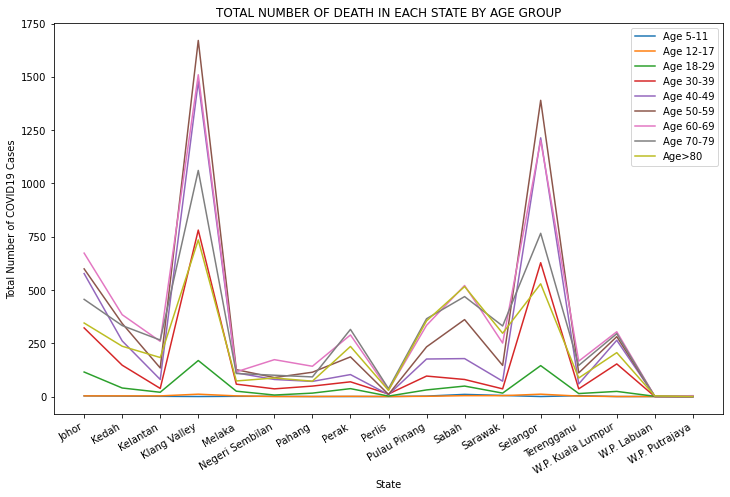

In [65]:
#plotting graph

plt.figure(figsize=(12, 8))
plt.plot(state_death_only.abs_5_11)
plt.plot(state_death_only.abs_12_17)
plt.plot(state_death_only.abs_18_29)
plt.plot(state_death_only.abs_30_39)
plt.plot(state_death_only.abs_40_49)
plt.plot(state_death_only.abs_50_59)
plt.plot(state_death_only.abs_60_69)
plt.plot(state_death_only.abs_70_79)
plt.plot(state_death_only.abs_80)

plt.title('TOTAL NUMBER OF DEATH IN EACH STATE BY AGE GROUP')
plt.xlabel('State')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['Age 5-11', 'Age 12-17','Age 18-29', 'Age 30-39', 'Age 40-49',
            'Age 50-59', 'Age 60-69', 'Age 70-79', 'Age>80'])
# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()



In [ ]:
#plot bar chart


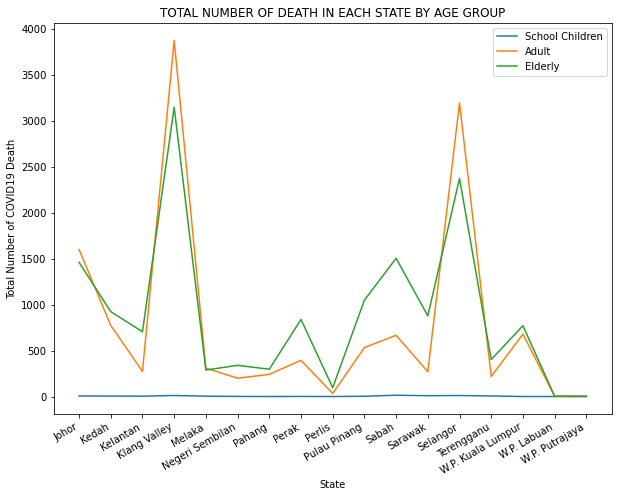

In [163]:
state_death_only['School_Children'] = state_death_only['abs_5_11'] + state_death_only['abs_12_17']
school_children = state_death_only['School_Children']
school_children

state_death_only['Adult'] = state_death_only['abs_18_29']+state_death_only['abs_30_39']+state_death_only['abs_40_49'] + state_death_only['abs_50_59']
adult=state_wise['Adult']
adult

state_death_only['Elderly'] = state_death_only['abs_60_69']+state_death_only['abs_70_79']+state_death_only['abs_80_+'] 
elderly = state_death_only['Elderly'] #adding new column
elderly

# Import library 
import matplotlib.pyplot as plt

# Plot graph
state_deathSC = state_death_only.School_Children
state_deathA = state_death_only.Adult
state_deathE = state_death_only.Elderly

plt.figure(figsize=(10, 8))
plt.plot(state_deathSC)
plt.plot(state_deathA)
plt.plot(state_deathE)


plt.title('TOTAL NUMBER OF DEATH IN EACH STATE BY AGE GROUP')
plt.xlabel('State')
plt.ylabel('Total Number of COVID19 Death')
plt.legend(['School Children', 'Adult','Elderly'])
# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()


In [170]:
#to plot barchart

In [171]:
Malaysia_death_only=casedeath_state.iloc[[4]]
total_death = Malaysia_death_only.sum().sum()
total_death

21368

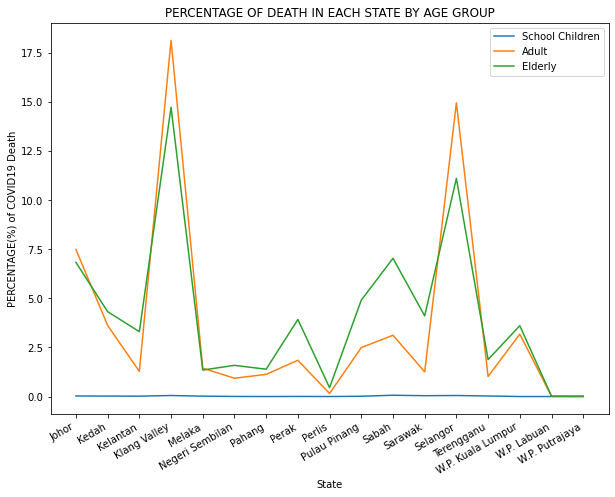

In [172]:
plt.figure(figsize=(10, 8))
death_percentage_SC = state_deathSC/total_death*100
death_percentage_A = state_deathA/total_death*100
death_percentage_E = state_deathE/total_death*100

plt.plot(death_percentage_SC)
plt.plot(death_percentage_A)
plt.plot(death_percentage_E);

plt.title('PERCENTAGE OF DEATH IN EACH STATE BY AGE GROUP')
plt.xlabel('State')
plt.ylabel('PERCENTAGE(%) of COVID19 Death')
plt.legend(['School Children', 'Adult','Elderly'])
# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()


In [173]:
#h)To determine the highest number of Covid19 death according to state

dfstate_death_sum = state_death_only.sum(axis=1)
dfstate_death_sum.sort_values(inplace = True, ascending = True)
dfstate_death_sum

state
W.P. Putrajaya           8
W.P. Labuan             15
Perlis                 287
Pahang                1146
Negeri Sembilan       1161
Melaka                1272
Terengganu            1339
Kelantan              2145
Sarawak               2606
Perak                 2702
W.P. Kuala Lumpur     3097
Pulau Pinang          3521
Kedah                 3629
Sabah                 4883
Johor                 6469
Selangor             11670
Klang Valley         14775
dtype: int64

In [174]:
#i)To determine what is the mean and interquartile range of Covid19 death
IQR = dfstate_death_sum.describe()


In [175]:
print('Highest death is in Klang Valley area\n',IQR)

Highest death is in Klang Valley area
 count       17.000000
mean      3572.058824
std       4056.432076
min          8.000000
25%       1161.000000
50%       2606.000000
75%       3629.000000
max      14775.000000
dtype: float64


In [176]:
#j)To determine the prevalence of ICU admission (ICU admission/total admission) 
#k)To determine percentage of ventilated VS non-ventilated COVID19 patient
#m)To determine the number of ICU beds available and the utilization (cases_admitted)


In [177]:
url6 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/icu.csv'

icu_df = pd.read_csv(url6, index_col=0, parse_dates=True, squeeze = True)
icu_df.head()

,state,beds_icu,beds_icu_rep,beds_icu_total,beds_icu_covid,vent,vent_port,icu_covid,icu_pui,icu_noncovid,vent_covid,vent_pui,vent_noncovid,vent_used,vent_port_used
date,,,,,,,,,,,,,,,
2020-03-24,Johor,10,22,32,10,11,2,0,0,1,0,0,0,8,0
2020-03-24,Kedah,35,0,35,16,34,0,2,1,12,1,1,0,19,0
2020-03-24,Kelantan,39,0,39,20,42,4,1,0,20,1,0,0,26,0
2020-03-24,Melaka,26,0,26,12,23,4,0,2,12,0,1,0,13,5
2020-03-24,Negeri Sembilan,18,0,18,10,14,9,0,0,8,0,0,0,1,6


In [178]:
list(icu_df)

['state',
 'beds_icu',
 'beds_icu_rep',
 'beds_icu_total',
 'beds_icu_covid',
 'vent',
 'vent_port',
 'icu_covid',
 'icu_pui',
 'icu_noncovid',
 'vent_covid',
 'vent_pui',
 'vent_noncovid',
 'vent_used',
 'vent_port_used']

In [179]:
#calculate number of COVID19 cases, ventilated and non ventilated
Covid_ICU = icu_df.groupby('date')['beds_icu_covid','beds_icu_total','icu_covid','icu_noncovid','vent','vent_covid','vent_noncovid'].sum()

Covid_ICU

<ipython-input-179-91493897d415>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Covid_ICU = icu_df.groupby('date')['beds_icu_covid','beds_icu_total','icu_covid','icu_noncovid','vent','vent_covid','vent_noncovid'].sum()


,beds_icu_covid,beds_icu_total,icu_covid,icu_noncovid,vent,vent_covid,vent_noncovid
date,,,,,,,
2020-03-24,272,549,69,172,523,36,0
2020-03-25,272,562,60,180,538,50,0
2020-03-26,272,562,71,180,538,49,0
2020-03-27,272,562,75,179,538,52,0
2020-03-28,316,644,94,220,634,65,0
...,...,...,...,...,...,...,...
2022-01-10,904,1629,253,702,2498,106,464
2022-01-11,904,1629,229,699,2498,99,460
2022-01-12,904,1629,215,679,2498,105,453


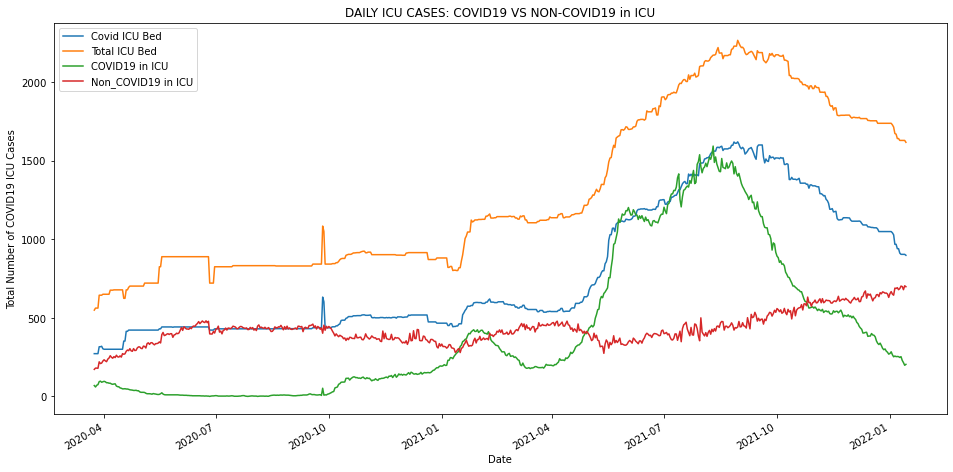

In [180]:
# Plot graph
bed_icucovid= Covid_ICU.beds_icu_covid 
bed_icutotal = Covid_ICU.beds_icu_total
ICU_covid = Covid_ICU.icu_covid
ICU_noncovid = Covid_ICU.icu_noncovid

plt.figure(figsize=(16,8))
plt.plot(bed_icucovid)
plt.plot(bed_icutotal)
plt.plot(ICU_covid)
plt.plot(ICU_noncovid)


plt.title('DAILY ICU CASES: COVID19 VS NON-COVID19 in ICU')
plt.xlabel('Date')
plt.ylabel('Total Number of COVID19 ICU Cases')
plt.legend(['Covid ICU Bed', 'Total ICU Bed', 'COVID19 in ICU', 'Non_COVID19 in ICU'])

# Making x-axis values (date) clearer

plt.gcf().autofmt_xdate()

plt.show()


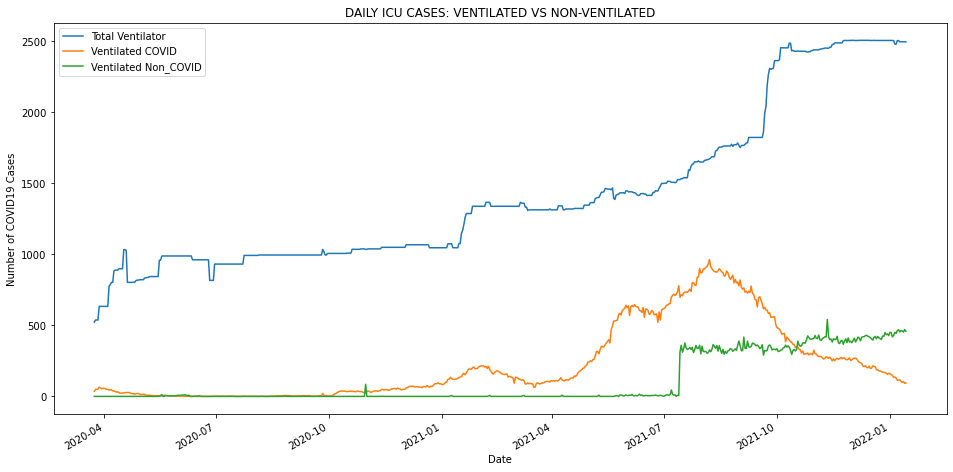

In [181]:
#ventilator
ventilator = Covid_ICU.vent
VENT_covid = Covid_ICU.vent_covid
VENT_noncovid =Covid_ICU.vent_noncovid
plt.figure(figsize=(16,8))
plt.plot(ventilator)
plt.plot(VENT_covid)
plt.plot(VENT_noncovid)



plt.title('DAILY ICU CASES: VENTILATED VS NON-VENTILATED')
plt.xlabel('Date')
plt.ylabel('Number of COVID19 Cases')
plt.legend(['Total Ventilator', 'Ventilated COVID','Ventilated Non_COVID'])

# Making x-axis values (date) clearer

plt.gcf().autofmt_xdate()

plt.show()

In [182]:
#n)To determine the number of hospital beds available and the utilization (cases_admitted)
#o)To determine the number of PKRC beds available and the utilization (cases_admitted)
url5 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/hospital.csv'
hospital_df = pd.read_csv(url5, index_col=0, parse_dates=True, squeeze = True)
hospital_df.head()

,state,beds,beds_covid,beds_noncrit,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,hosp_covid,hosp_pui,hosp_noncovid
date,,,,,,,,,,,,,
2020-03-24,Johor,1440,434,1408,0,0,0,0,0,0,18,9,1
2020-03-24,Kedah,1218,143,1183,0,0,0,0,0,0,46,5,12
2020-03-24,Kelantan,1463,280,1424,9,6,15,1,0,1,78,58,23
2020-03-24,Melaka,1091,82,1065,0,0,0,0,0,0,19,10,12
2020-03-24,Negeri Sembilan,1223,253,1205,0,0,0,0,0,0,90,13,8


In [183]:
list(hospital_df)

['state',
 'beds',
 'beds_covid',
 'beds_noncrit',
 'admitted_pui',
 'admitted_covid',
 'admitted_total',
 'discharged_pui',
 'discharged_covid',
 'discharged_total',
 'hosp_covid',
 'hosp_pui',
 'hosp_noncovid']

In [184]:
Covid_hospital = hospital_df.groupby('date')['beds_covid','beds','admitted_covid','admitted_total','hosp_covid','hosp_noncovid'].sum()

Covid_hospital

<ipython-input-184-ce30e0cd59b9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Covid_hospital = hospital_df.groupby('date')['beds_covid','beds','admitted_covid','admitted_total','hosp_covid','hosp_noncovid'].sum()


,beds_covid,beds,admitted_covid,admitted_total,hosp_covid,hosp_noncovid
date,,,,,,
2020-03-24,3587,19457,22,36,1019,357
2020-03-25,3611,19419,110,211,1229,249
2020-03-26,3819,19627,89,170,1347,7407
2020-03-27,3819,19627,99,231,1422,7691
2020-03-28,3969,21118,156,272,1491,8324
...,...,...,...,...,...,...
2022-01-10,11493,40701,263,748,2474,21808
2022-01-11,11453,40681,358,915,2421,22305
2022-01-12,11430,40497,390,937,2522,22587


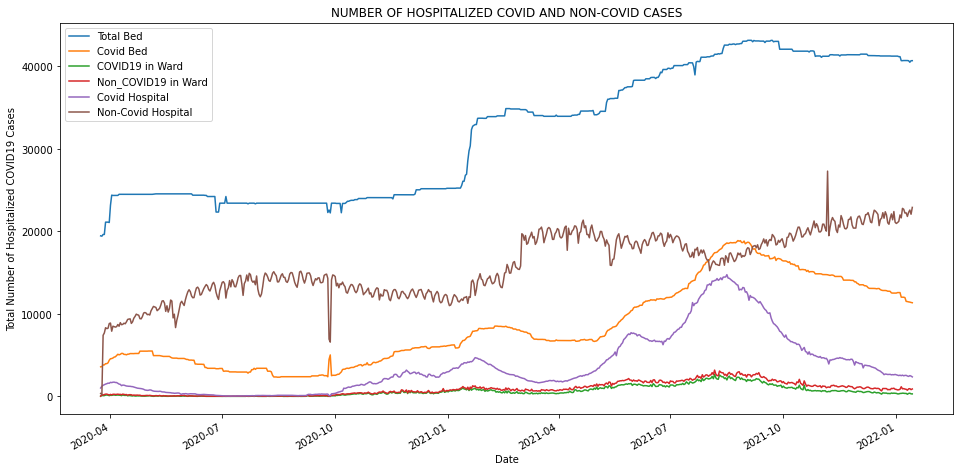

In [185]:
# Plot graph
bed_covid= Covid_hospital.beds_covid 
bed_total = Covid_hospital.beds
covid_admission= Covid_hospital.admitted_covid 
total_admission = Covid_hospital.admitted_total
covid_hospital= Covid_hospital.hosp_covid 
noncovid_hospital = Covid_hospital.hosp_noncovid 


plt.figure(figsize=(16,8))

plt.plot(bed_total)
plt.plot(bed_covid)
plt.plot(covid_admission)
plt.plot(total_admission)
plt.plot(covid_hospital)
plt.plot(noncovid_hospital)


plt.title('NUMBER OF HOSPITALIZED COVID AND NON-COVID CASES')
plt.xlabel('Date')
plt.ylabel('Total Number of Hospitalized COVID19 Cases')
plt.legend(['Total Bed', 'Covid Bed', 'COVID19 in Ward', 'Non_COVID19 in Ward', 
            'Covid Hospital', 'Non-Covid Hospital'])

# Making x-axis values (date) clearer

plt.gcf().autofmt_xdate()

plt.show()

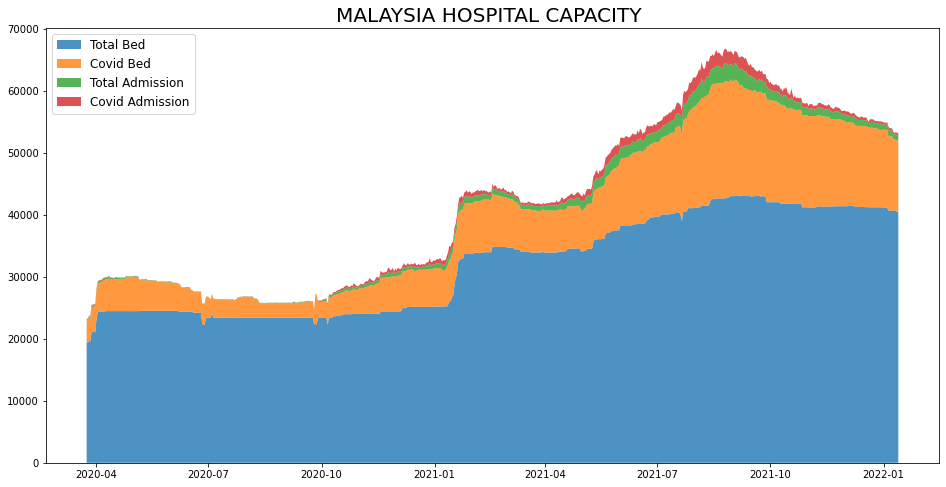

In [134]:
plt.figure(figsize=(16,8))
plt.stackplot(Covid_hospital.index, [Covid_hospital['beds'], Covid_hospital['beds_covid'],
             Covid_hospital['admitted_total'], Covid_hospital['admitted_covid']],
             labels= ['Total Bed', 'Covid Bed', 'Total Admission', 'Covid Admission'], 
              alpha=0.8)
plt.legend(loc=2, fontsize='large')
plt.title('MALAYSIA HOSPITAL CAPACITY ', size=20)
plt.show()

In [188]:
#o)To determine the number of PKRC beds available and the utilization (cases_admitted)
url7 = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/pkrc.csv'
pkrc_df = pd.read_csv(url7, index_col=0, parse_dates=True, squeeze = True)
pkrc_df.head()

,state,beds,admitted_pui,admitted_covid,admitted_total,discharged_pui,discharged_covid,discharged_total,pkrc_covid,pkrc_pui,pkrc_noncovid
date,,,,,,,,,,,
2020-03-28,Kelantan,147,0,0,0,0,0,0,0,53,0
2020-03-28,Perlis,54,0,0,0,0,0,0,8,3,0
2020-03-28,Pulau Pinang,58,0,0,0,0,0,0,13,0,0
2020-03-28,Sarawak,74,0,0,0,0,0,0,22,0,0
2020-03-28,Selangor,1452,0,12,12,0,5,5,145,0,8


In [189]:
list(pkrc_df)

['state',
 'beds',
 'admitted_pui',
 'admitted_covid',
 'admitted_total',
 'discharged_pui',
 'discharged_covid',
 'discharged_total',
 'pkrc_covid',
 'pkrc_pui',
 'pkrc_noncovid']

In [190]:
pkrc_state= pkrc_df.groupby('state')['beds', 'admitted_pui', 'admitted_covid', 'admitted_total','pkrc_covid','pkrc_pui', 'pkrc_noncovid'].sum()
pkrc_state

<ipython-input-190-d5157788954c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pkrc_state= pkrc_df.groupby('state')['beds', 'admitted_pui', 'admitted_covid', 'admitted_total','pkrc_covid','pkrc_pui', 'pkrc_noncovid'].sum()


,beds,admitted_pui,admitted_covid,admitted_total,pkrc_covid,pkrc_pui,pkrc_noncovid
state,,,,,,,
Johor,756429,283,54081,54364,412852,1262,289
Kedah,337347,51,18971,19022,114997,193,0
Kelantan,676214,1675,48977,50652,350500,10452,4298
Melaka,387397,70,22946,23016,155258,147,75
Negeri Sembilan,434115,0,27962,27962,161761,0,179
Pahang,849609,2295,48944,51239,443351,16428,3541
Perak,382742,61,23215,23276,156925,394,58571
Perlis,98440,324,1287,1611,12983,987,2
Pulau Pinang,568648,0,32234,32234,187363,0,443


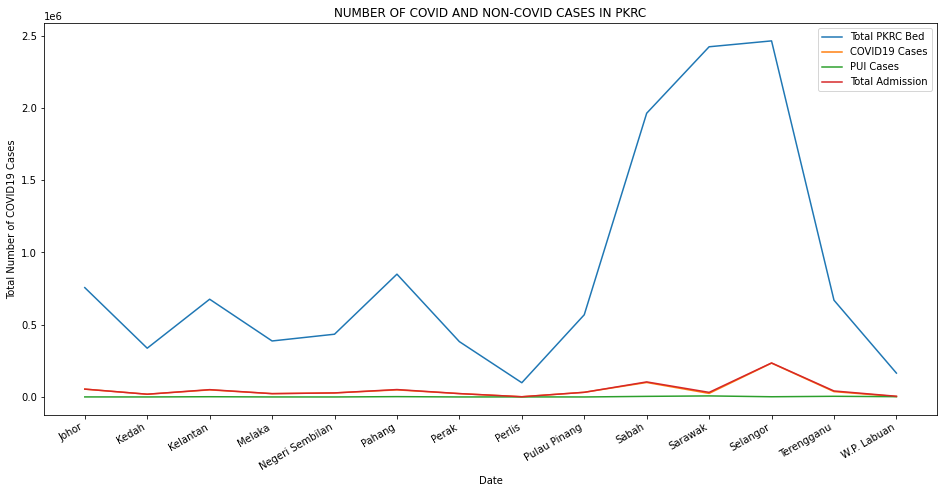

In [191]:
# Plot graph

total_bed= pkrc_state.beds
Covid = pkrc_state.admitted_covid
PUI = pkrc_state.admitted_pui
total_admission = pkrc_state.admitted_total


plt.figure(figsize=(16,8))
plt.plot(total_bed)
plt.plot(Covid)
plt.plot(PUI)
plt.plot(total_admission)


plt.title('NUMBER OF COVID AND NON-COVID CASES IN PKRC')
plt.xlabel('Date')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['Total PKRC Bed', 'COVID19 Cases', 'PUI Cases', 'Total Admission']) 
          

# Making x-axis values (date) clearer

plt.gcf().autofmt_xdate()

plt.show()

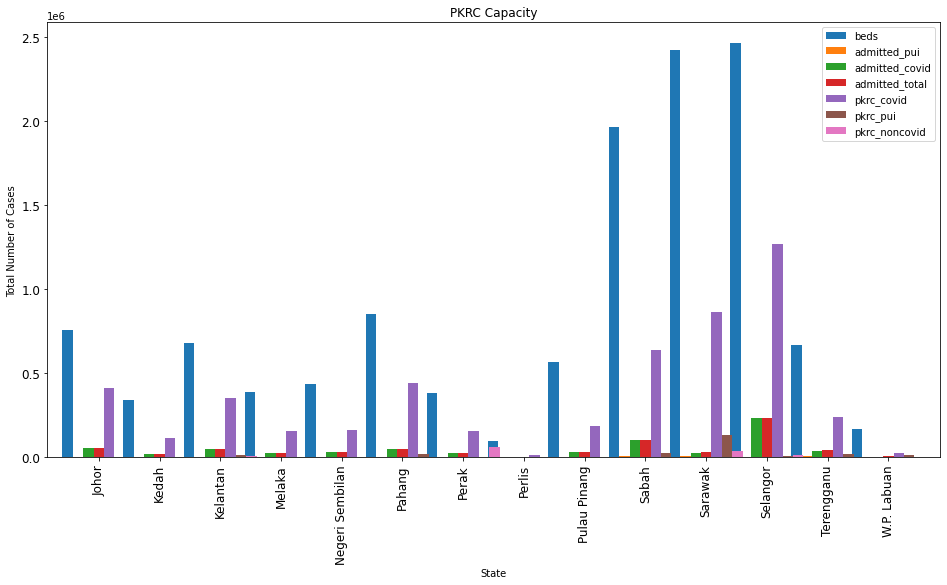

In [194]:
pkrc_state.plot(kind='bar', title='PKRC Capacity', ylabel='Total Number of Cases',
         xlabel='State', figsize=(16, 8), width = 1.2, fontsize = 'large');

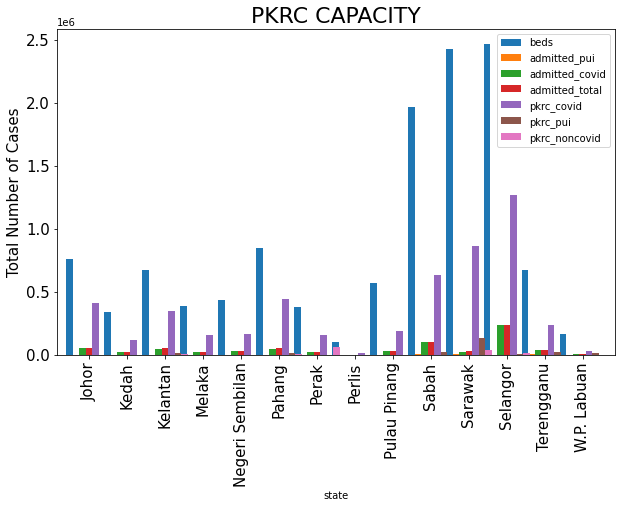

In [200]:
#barplot other ways
ax = pkrc_state.plot(kind='bar', figsize=(10,6), fontsize=15, width= 1.2);
ax.set_alpha(0.8)
ax.set_title("PKRC CAPACITY", fontsize=22)
ax.set_ylabel("Total Number of Cases", fontsize=15);
plt.show()

In [198]:
pkrc_date= pkrc_df.groupby('date')['beds', 'admitted_pui', 'admitted_covid', 'admitted_total','pkrc_covid','pkrc_pui', 'pkrc_noncovid'].sum()
pkrc_date

<ipython-input-198-7de07188401f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pkrc_date= pkrc_df.groupby('date')['beds', 'admitted_pui', 'admitted_covid', 'admitted_total','pkrc_covid','pkrc_pui', 'pkrc_noncovid'].sum()


,beds,admitted_pui,admitted_covid,admitted_total,pkrc_covid,pkrc_pui,pkrc_noncovid
date,,,,,,,
2020-03-28,1882,0,13,13,194,64,8
2020-03-29,1882,19,41,60,252,59,2
2020-03-30,1882,35,22,57,278,98,10
2020-03-31,2209,10,34,44,471,58,14
2020-04-01,2237,1,29,30,512,70,22
...,...,...,...,...,...,...,...
2022-01-10,12382,12,413,425,3524,59,80
2022-01-11,12382,14,543,557,3599,60,75
2022-01-12,12382,14,585,599,3602,64,216


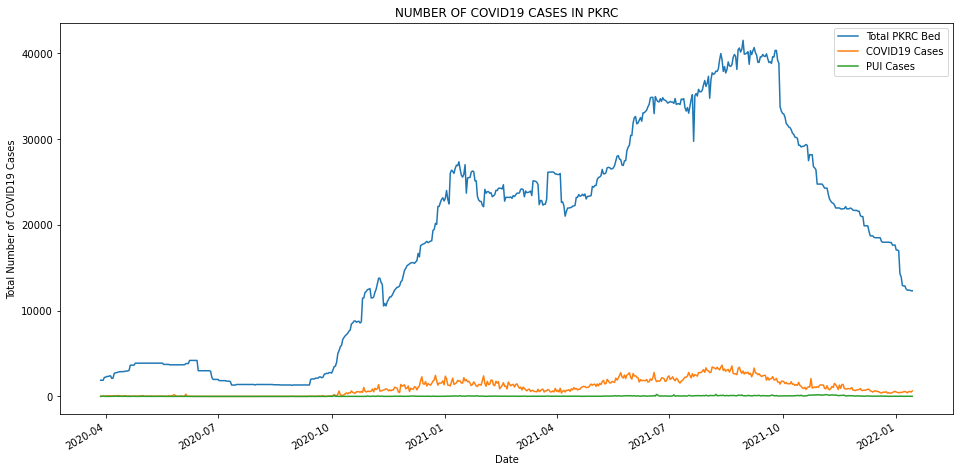

In [199]:
# Plot graph

Bed= pkrc_date.beds
CovidPKRC = pkrc_date.admitted_covid
PUIPKRC = pkrc_date.admitted_pui
TOTAL_admission = pkrc_date.admitted_total


plt.figure(figsize=(16,8))
plt.plot(Bed)
plt.plot(CovidPKRC)
plt.plot(PUIPKRC)



plt.title('NUMBER OF COVID19 CASES IN PKRC')
plt.xlabel('Date')
plt.ylabel('Total Number of COVID19 Cases')
plt.legend(['Total PKRC Bed', 'COVID19 Cases', 'PUI Cases']) 
          
plt.gcf().autofmt_xdate()
plt.show()